# Tarea 9 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

## Ejercicio 2

Utiliza tu función `derivadaNumerica` para calcular la derivada de la función $\cos$ en un punto $x_0\in[0,1)$. Compara tu resultado con el que indica el cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$. Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)},$$
respecto a $h$.

Ocupo la función $derivadaNumerica(f,x_0,h_0)$ del ejercicio $1$

In [1]:
#Defino la función derivadaNumerica con la cual dada la función f, el punto x0 y una lista de incrementos h0 se puede dar una aproximación al valor de la derivada.
#Esta función la defino para recibir arreglos e intervalos para así poder usarla en el ejercicio 2
function derivadaNumerica(f,x0,h0)
    #Defino la variable longitud que me da la cantidad de elementos del arreglo h0
    longitud=length(h0)
    #Propongo un arreglo en el cuál iré guardando las aproximaciones de la derivada dados distintos valores del arreglo h0
    arreglo=[]
    #Hago la función g(x) a partir de f
    g(x)=f(x)
    #Doy la función d(h) la cuál es simplemente la fórmula de derivada de Newton sin el límite
    d(h)=(g(x0+h)-g(x0))/h
    for i in 1:longitud #Ciclo for que aplica la función d(h) a los elementos de la lista
        dif=d(h0[i]) #Variable dif que almacena el valor de la función d(h) aplicada al i-ésimo elemento del arreglo h0
        push!(arreglo,dif) #Guardamos el valor de dif en el arreglo declarado anteriormente
    end
    #Doy como resultado el arreglo con todas las aproximaciones
    return arreglo
end

derivadaNumerica (generic function with 1 method)

In [2]:
#Propongo la función cos.(x) para que acepte la evaluación del arreglo
t(x)=cos.(x)

t (generic function with 1 method)

In [3]:
#Doy un arreglo a partir de un linspace partiendo el intervalo [1,100001] 100 veces (tendremos 100 valores)
l=linspace(1,1001,100)

1.0:10.1010101010101:1001.0

In [4]:
#Defino la función k(x)=1/x
k(x)=1/x

k (generic function with 1 method)

In [5]:
#Declaro el arreglo 'lista'
lista=[]

0-element Array{Any,1}

In [6]:
#Usando el arreglo 'lista' guardo los valores del arreglo l. Esto debido a que quiero ir evaluando valores de h que tiendan a cero, lo cual notaremos en la lista, tendremos un arreglo 'lista' con valores decrecientes que cumplen lo anterior.
lista=k(l)

100-element Array{Float64,1}:
 1.0        
 0.0900819  
 0.0471653  
 0.0319458  
 0.0241522  
 0.0194156  
 0.0162322  
 0.0139456  
 0.0122237  
 0.0108803  
 0.00980295 
 0.00891972 
 0.00818249 
 ⋮          
 0.00112374 
 0.00111112 
 0.00109879 
 0.00108673 
 0.00107493 
 0.00106338 
 0.00105208 
 0.00104102 
 0.00103019 
 0.00101958 
 0.00100918 
 0.000999001

In [7]:
#Evaluo la función derivadaNumerica con la función t(x)=cos.(x), el punto x0=0 y con una lista h0=lista
d=derivadaNumerica(t,0.1,lista)

100-element Array{Any,1}:
 -0.541408
 -0.144484
 -0.123257
 -0.115708
 -0.111839
 -0.109486
 -0.107904
 -0.106768
 -0.105912
 -0.105244
 -0.104709
 -0.10427 
 -0.103903
  ⋮       
 -0.100392
 -0.100386
 -0.10038 
 -0.100374
 -0.100368
 -0.100362
 -0.100357
 -0.100351
 -0.100346
 -0.100341
 -0.100335
 -0.10033 

Esta parte de aquí es para poder graficar el valor de la derivada del $cos(x)$ en $0.1$ que es $-sin(0.1)=-0.09983341664\ldots$

In [8]:
vds(x)=x*0-0.09983341664 #Función que a todo valor lo multiplica por cero y suma una constante, en este caso el valor de la derivada en 0.1

vds (generic function with 1 method)

In [9]:
valorreal=[] #Arreglo para graficar

0-element Array{Any,1}

In [10]:
valorreal=vds(l) #Arreglo lleno de ceros (tantos como el linspace que tomé)

-0.09983341664:0.0:-0.09983341664

A continuación la gráfica que compara 1/h (los valores del $linspace$ sin aplicar su inversa) contra los valores arrojados por la función $derivacionNumerica$ para la función $cos(x)$ en $0.1$

In [11]:
using PyPlot #Invocamos a PyPlot

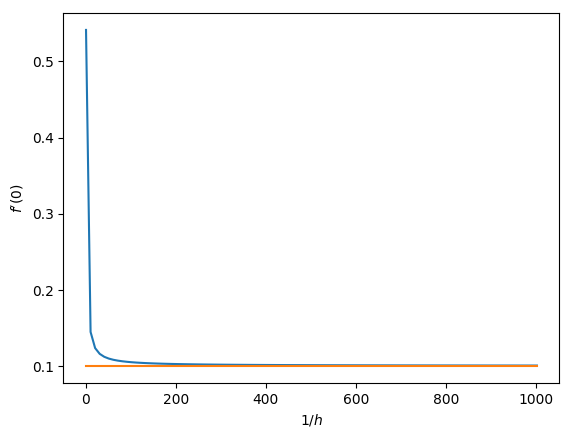

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5880c47e90>

In [12]:
#De azul va la gráfica de los valores dados por la derivación numérica contra las h tomadas
#De naranja el valor de la derivada del cos(x) en 0 que es 0
xlabel(L"$1/h$")
ylabel(L"$f'(0)$")
plot(l,abs.(d))
plot(l,abs.(valorreal))

__Nota: Para poder obtener el valor del error $\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$ dado que $\Delta f(x_0,h)/h$ no es más que la función _derivadaNumerica_ y este código acepta cualquier función $f$ con derivada definida para generar el código del error epsilon es necesario que éste pueda calcular el valor de $f'$ por lo que ocupo SymPy forzosamente.__

In [13]:
using SymPy

In [14]:
#Función que arroja los valores del error epsilón asociado a nuestra aproximación. Requiere una función f, el punto x0 de la aproximación y el valor del incremento h0.
function errorepsilon(f,x0,h0)
    #Defino la variable longitud que me da la cantidad de elementos del arreglo h0
    longitud=length(h0)
    #Doy la función d(h) la cuál es la misma usada en la funcion derivadaNumerica
    d(h)=(g(x0+h)-g(x0))/h
    ### Aqui es donde aplico SymPy pues este programa debe funcionar para cualquier f que yo quiera, calculo la derivada de la función introducida
    ### Variable simbólica x
    x = Sym("x")
    ### Función con variable x
    g = f(x)
    ### Aplico la diferenciación a g(x)
    dg = diff(g(x))
    ### La vuelvo una función de Julia
    df = lambdify(dg,[x]) 
    ###Dejo de usar SymPy
    #Aquí está el arreglo donde guardaré los valores del error
    listaerror=[]
    for i in 1:longitud #Ciclo for que calculará el valor epsilon a cada valor de la lista introducida
        epsilon=(d(h0[i])-df(x0))/df(x0) #Formula del error epsilon
        push!(listaerror,epsilon) #Guardo el valor de dicha epsilon en mi arreglo
    #Fin de iteración
    end
    #Como resultado arrojo la listaerror
    return listaerror
#Fin
end

errorepsilon (generic function with 1 method)

In [15]:
#Prueba
error=errorepsilon(t,0.1,lista)

  likely near In[15]:2
  likely near In[15]:2
  likely near In[15]:2
in jprint at /home/juser/.julia/v0.6/SymPy/src/display.jl


100-element Array{Any,1}:
    4.42311444441233
   0.447251705273009
   0.234625682348977
   0.159012541196940
   0.120255285946336
  0.0966881840235135
  0.0808444399654365
  0.0694620091347586
  0.0608891302533036
  0.0541998579921000
  0.0488348549597492
  0.0444362963475309
  0.0407646198564611
                   ⋮
 0.00559972650503747
 0.00553688048838865
 0.00547542946285136
 0.00541532749369614
 0.00535653063581970
 0.00529899683744296
 0.00524268583150908
 0.00518755904342831
 0.00513357950874315
 0.00508071178047389
 0.00502892185881078
 0.00497817711971926

In [16]:
#Para graficar usamos PyPlot
using PyPlot

Para graficar el valor cero en mi gráfica realizo lo siguiente:

In [17]:
cero(x)=x*0 #Función que a todo valor lo multiplica por cero

cero (generic function with 1 method)

In [18]:
zero=[] #Arreglo que guardará tantos ceros como sean evaluados en mi función cero(x)

0-element Array{Any,1}

In [19]:
zero=cero(l)

0.0:0.0:0.0

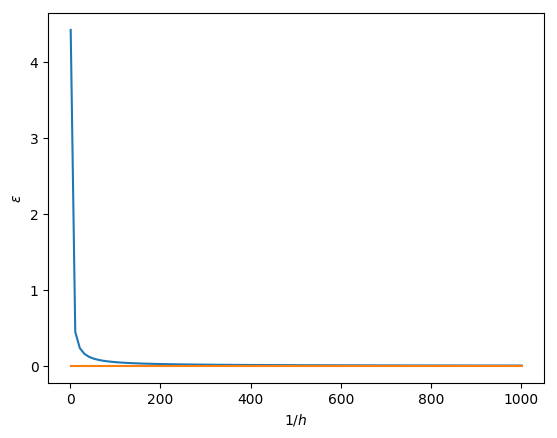

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f585be0f050>

In [20]:
#De azul va la gráfica de los valores del error epsilon
#De naranja la constante cero el cual es el valor al que se debería aproximar mi error cuando 1/h aumente
xlabel(L"$1/h$")
ylabel(L"$\epsilon$")
plot(l,error);
plot(l,zero)

## Ejercicio 3

Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe alguna forma de mejorar el cálculo de la derivada numérica? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series?

Para mejorar el cálculo de la derivada debemos hacer que nuestro error vaya del orden de $h^2$. Para esto consideremos la expresión para la serie de Taylor de $f(x+h)$:
$$f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)$$
En el caso $f(x-h)$ dicha expresión es:
$$f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)$$
Restandole la segunda expresión a la primera se obtiene:
$$f(x+h)-f(x-h)=2hf'(x) + \frac{h^{3}}{3} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{5}\right)$$
Dividiendo toda la expresión entre $2h$ notamos que reducimos un grado al exponente de las $h$ teniendo un error de orden $4$:
$$\frac{f(x+h)-f(x-h)}{2h}=f'(x) + \frac{h^{2}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)$$
De aquí:
$$\mathcal{O}\left(h^{2}\right)=\frac{f(x+h)-f(x-h)}{2h}-f'(x)$$
Si definimos la _derivada numérica simétrica (la derivada hacia adelante menos la derivada hacia atrás)_ con lo hecho probamos que el orden es de $h^2$ y por ende tendremos una mejoría de nuestro cálculo usándola. Esto se debe a que considera la vecindad total alrededor del punto donde estimo (dos direcciones) y no solo la parcialidad por un extremo (una dirección).

## Ejercicio 4

Implementa la _derivada simétrica_ en `Julia` como `derivada_Simetrica` y repite la comparativa que realizaste en el __ejercicio 2__.

In [21]:
#Defino la función derivadaSimetrica (usando exactamente el mismo codigo que para la derivadaNumerica) con la cual dada la función f, el punto x0 y una lista de incrementos h0 se puede dar una aproximación al valor de la derivada.
#Esta función la defino para recibir arreglos e intervalos para así poder usarla en el ejercicio 2
function derivadaSimetrica(f,x0,h0)
    #Defino la variable longitud que me da la cantidad de elementos del arreglo h0
    longitud=length(h0)
    #Propongo un arreglo en el cuál iré guardando las aproximaciones de la derivada dados distintos valores del arreglo h0
    arreglo=[]
    #Hago la función g(x) a partir de f
    g(x)=f(x)
    ### Aquí en vez del término "g(x0)" se pone el término "g(x0-h)" apelando al ejercicio 3, se divide entre "(2*h)" en vez de "h"
    ds(h)=(g(x0+h)-g(x0-h))/(2*h)
    for i in 1:longitud #Ciclo for que aplica la función d(h) a los elementos de la lista
        dif=ds(h0[i]) #Variable dif que almacena el valor de la función d(h) aplicada al i-ésimo elemento del arreglo h0
        push!(arreglo,dif) #Guardamos el valor de dif en el arreglo declarado anteriormente
    end
    #Doy como resultado el arreglo con todas las aproximaciones
    return arreglo
end

derivadaSimetrica (generic function with 1 method)

In [22]:
#Prueba usando la lista del ejercicio 2, como función cos(x) y evaluando en el punto 0.1
derivsim=derivadaSimetrica(t,0.1,lista)

100-element Array{Any,1}:
 -0.0840069
 -0.0996985
 -0.0997964
 -0.0998164
 -0.0998237
 -0.0998271
 -0.099829 
 -0.0998302
 -0.0998309
 -0.0998314
 -0.0998318
 -0.0998321
 -0.0998323
  ⋮        
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334
 -0.0998334

La derivada de $cos(x)$ es $-sin(x)$ la cuál evaluada en $0.1$ resulta igual a $-0.09983341664\ldots$

A continuación la gráfica que compara 1/h (los valores del $linspace$ sin aplicar su inversa) contra los valores arrojados por la función $derivacionSimetrica$ para la función $cos(x)$ en $0.1$, usando el arreglo valorreal calculado en el ejercicio $2$.

In [23]:
#Para graficar usamos PyPlot
using PyPlot

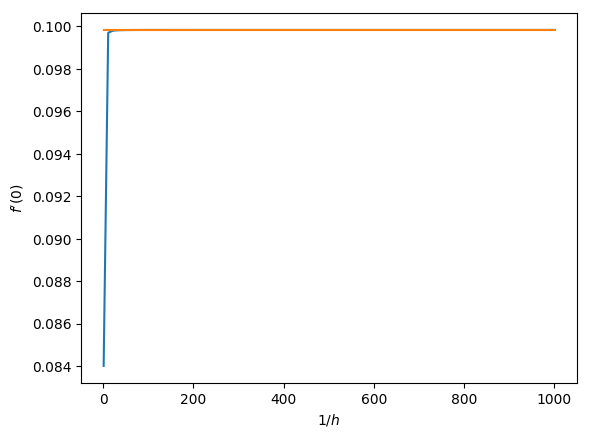

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f585bae4fd0>

In [24]:
#De azul va la gráfica de los valores dados por la derivación simétrica contra las h tomadas
#De naranja el valor de la derivada del cos(x) en 0.1 que es aproximadamente 0.09983341664
xlabel(L"$1/h$")
ylabel(L"$f'(0)$")
plot(l,abs.(derivsim))
plot(l,abs.(valorreal))

Notamos que la derivada simétrica converge muy rápido al valor de la derivada (casi lineal con pendiente muy grande en valor) y de hecho mucho más rápido que la derivada numérica del ejercicio 2.
Ahora para el error epsilon adecuamos la función anterior para que concuerde con la definición de la derivada simétrica reiterando que en el ejercicio 2 establecí el motivo de usar SymPy.

In [25]:
using SymPy

In [26]:
#Función que arroja los valores del error epsilón asociado a nuestra aproximación. Requiere una función f, el punto x0 de la aproximación y el valor del incremento h0. ###Adecuada a la derivación simétrica
function errorepsilonsim(f,x0,h0)
    #Defino la variable longitud que me da la cantidad de elementos del arreglo h0
    longitud=length(h0)
    #Doy la función d(h) la cuál es la misma usada en la funcion derivadaSimetrica
    ####Este es el unico cambio en el código respecto a la función errorepsilon
    d(h)=(g(x0+h)-g(x0-h))/(2*h)
    ### Aqui es donde aplico SymPy pues este programa debe funcionar para cualquier f que yo quiera, calculo la derivada de la función introducida
    ### Variable simbólica x
    x = Sym("x")
    ### Función con variable x
    g = f(x)
    ### Aplico la diferenciación a g(x)
    dg = diff(g(x))
    ### La vuelvo una función de Julia
    df = lambdify(dg,[x]) 
    ###Dejo de usar SymPy
    #Aquí está el arreglo donde guardaré los valores del error
    listaerror=[]
    for i in 1:longitud #Ciclo for que calculará el valor epsilon a cada valor de la lista introducida
        epsilon=(d(h0[i])-df(x0))/df(x0) #Formula del error epsilon
        push!(listaerror,epsilon) #Guardo el valor de dicha epsilon en mi arreglo
    #Fin de iteración
    end
    #Como resultado arrojo la listaerror
    return listaerror
#Fin
end

errorepsilonsim (generic function with 1 method)

In [27]:
#Prueba
errorsim=errorepsilonsim(t,0.1,lista)

100-element Array{Any,1}:
    -0.158529015192103
  -0.00135190925992709
 -0.000370719948104193
 -0.000170080226561450
  -9.72188848883414e-5
  -6.28262197868269e-5
  -4.39133076774476e-5
  -3.24130995990473e-5
  -2.49030818559172e-5
  -1.97300978266558e-5
  -1.60162304119865e-5
  -1.32601888162292e-5
  -1.11588317647624e-5
                     ⋮
  -2.10463652836723e-7
  -2.05765963910212e-7
  -2.01223756908558e-7
  -1.96829938735836e-7
  -1.92579346720281e-7
  -1.88464503821884e-7
  -1.84479569280806e-7
  -1.80620555472119e-7
  -1.76880755607145e-7
  -1.73256469532485e-7
  -1.69742716261720e-7
  -1.66333823931486e-7

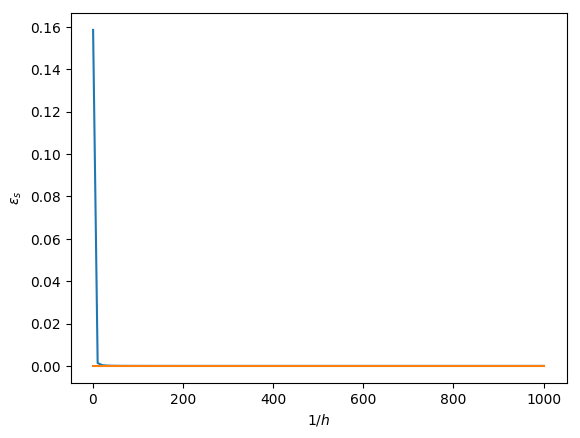

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f585b928d50>

In [28]:
#De azul va la gráfica de los valores del error epsilon simétrico
#De naranja la constante cero el cual es el valor al que se debería aproximar mi error cuando 1/h aumente
xlabel(L"$1/h$")
ylabel(L"$\epsilon_s$")
plot(l,abs.(errorsim));
plot(l,zero)

Se aprecia que comparado al error de la derivada numérica el de la derivada simétrica se aproxima más rápido a cero.

## Ejercicio 5

Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Sea el operador $\Delta_h:\:f(x)\mapsto\:f(x+h)-f(x)$. Sean $\:f,g :\mathbb{R} \rightarrow \mathbb{R},\ 2$ funciones, y sean $\alpha,\beta\in\mathbb{R}$

_P.D. $\Delta_h$ es lineal._

Aplicando el operador $\Delta_h$ a $(\alpha\:f+\beta\:g)(x)$:

$$\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=(\alpha\:f+\beta\:g)(x+h)-(\alpha\:f+\beta\:g)(x)=\alpha\:f(x+h)+\beta\:g(x+h)-\alpha\:f(x)-\beta\:g(x)$$
Entonces
$$\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=\alpha\left[\:f(x+h)-f(x)\right]+\beta\left[g(x+h)-g(x)\right]=\alpha\Delta_{h}\:f(x)+\beta\Delta_{h}\:g(x)$$
Por lo tanto
$$\:\:\Delta_{h}\left[(\alpha\:f+\beta\:g)(x)\right]=\alpha\Delta_{h}\:f(x)+\beta\Delta_{h}\:g(x)$$
$$\blacksquare$$
Ahora retomando lo visto en clase:

\begin{eqnarray}
\Delta_{h}\left[f(x)\right]=f(x+h)-f(x)&=& \left[h \left. \frac{d}{d \xi}  \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}   \right|_{\substack{ \xi_{1}=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}   \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)\right]f{\left (x \right )}\\
&=&\left[ \sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }} \right]f(x)
\end{eqnarray}
Y por lo tanto
$$\:\:\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}$$

## Ejercicio 6

Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

Demostrado lo anterior es fácil ver que:
\begin{eqnarray}
\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}&=&\frac{1}{h}\log\left(1+\Delta_h\right)\\
&=&\frac{1}{h}\left( \Delta_h-\frac{1}{2}\Delta^2_h +\dots\right).
\end{eqnarray}

__Razonamiento__

Para relacionar el operador derivada exacta con el operador diferencia finita hacia adelante primero identifiquemos a este último como una función $\phi$

$$\Delta_{h}=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{\xi=x}}.$$

Recordando que para el caso un operador $\Theta$ (operador derivada) se tiene que $\Theta^{2}=\Theta \circ \Theta$, entonces:

$$\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)=\sum_{n=1}^{\infty} \frac{1}{n!}\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)^{n}.$$

Ahora por lo que sabemos de expansión en series:

$$\displaystyle e^{x}-1=\sum_{n=1}^{\infty}\frac{x^{n}}{n!}$$

Por lo tanto:

$$\Delta_{h}=\exp\left(h\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}\right)-1,$$

__De aqui podemos poner al operador derivada exacta en términos del operador diferencia finita hacia adelante:__

$$\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\log\left(1+\Delta_{h}\right)$$
Por lo tanto
$$\:\:\left.\frac{d}{d\xi}\right|_{\substack{\xi=x}}=\frac{1}{h}\sum_{n=1}^{\infty}\frac{(-1)^{n+1}}{n}\Delta_{h}^{\:n}=\frac{1}{h}\left(\Delta_{h}-\frac{1}{2}\Delta_{h}^{\:2}+\cdots\right).$$

De esta expresión (y justo como se planteó en el notebook de este tema), notamos que si se toma la serie hasta $n=1$ se obtiene la aproximación de la derivada numérica hacia adelante presentada el el ejercicio 1. Concluimos entonces que entre más términos se tomen de la serie, la aproximación será mejor.